# Train Landcover Network

In [1]:
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, ReLU, Softmax, GlobalAveragePooling2D
from keras.optimizers import SGD
import scipy.io as sio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
satData = sio.loadmat("../data/satData.mat")
XTrain = satData["XTrain"]
XTest = satData["XTest"]
XVal = satData["XVal"]
YTrain = satData["YTrain"]
YTest = satData["YTest"]
YVal = satData["YVal"]

print("XTrain shape =", XTrain.shape)
print("XTest shape =", XTest.shape)
print("XVal shape =", XVal.shape)
print("YTrain shape =", YTrain.shape)
print("YTest shape =", YTest.shape)
print("YVal shape =", YVal.shape)

XTrain shape = (28, 28, 4, 3000)
XTest shape = (28, 28, 4, 600)
XVal shape = (28, 28, 4, 600)
YTrain shape = (6, 3000)
YTest shape = (6, 600)
YVal shape = (6, 600)


In [4]:
XTrain = XTrain.transpose([3, 0, 1, 2])
XTest = XTest.transpose([3, 0, 1, 2])
XVal = XVal.transpose([3, 0, 1, 2])
YTrain = YTrain.T
YTest = YTest.T
YVal = YVal.T

print("XTrain shape =", XTrain.shape)
print("XTest shape =", XTest.shape)
print("XVal shape =", XVal.shape)
print("YTrain shape =", YTrain.shape)
print("YTest shape =", YTest.shape)
print("YVal shape =", YVal.shape)

XTrain shape = (3000, 28, 28, 4)
XTest shape = (600, 28, 28, 4)
XVal shape = (600, 28, 28, 4)
YTrain shape = (3000, 6)
YTest shape = (600, 6)
YVal shape = (600, 6)


This code creates the architecture.

In [5]:
model = Sequential([InputLayer(input_shape=(28, 28, 4)), 
                    Conv2D(filters=20, kernel_size=(3, 3)), 
                    ReLU(), 
                    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)), 
                    GlobalAveragePooling2D(),
                    Dense(units=6), 
                    Softmax()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        740       
                                                                 
 re_lu (ReLU)                (None, 26, 26, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 20)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 20)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 126       
                                                                 
 softmax (Softmax)           (None, 6)                 0

This code sets preliminary training options.

[SGD()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

[CategoricalCrossentropy()](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

[CategoricalAccuracy()](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/CategoricalAccuracy)

[compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [6]:
optimizer = SGD(learning_rate=0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

We can use the "verbose" option to monitor network training.

[fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [7]:
history = model.fit(XTrain, YTrain, epochs=25, batch_size=64, verbose="auto", validation_data=(XVal, YVal))

Epoch 1/25
47/47 [==============================] - 2s 41ms/step - loss: 20.5336 - categorical_accuracy: 0.2317 - val_loss: 15.1574 - val_categorical_accuracy: 0.2117
Epoch 2/25
47/47 [==============================] - 2s 44ms/step - loss: 10.0479 - categorical_accuracy: 0.3457 - val_loss: 3.9849 - val_categorical_accuracy: 0.4550
Epoch 3/25
47/47 [==============================] - 2s 45ms/step - loss: 7.2658 - categorical_accuracy: 0.4327 - val_loss: 11.5891 - val_categorical_accuracy: 0.4500
Epoch 4/25
47/47 [==============================] - 1s 23ms/step - loss: 6.7684 - categorical_accuracy: 0.4580 - val_loss: 3.6829 - val_categorical_accuracy: 0.6317
Epoch 5/25
47/47 [==============================] - 1s 32ms/step - loss: 4.5024 - categorical_accuracy: 0.5590 - val_loss: 1.3070 - val_categorical_accuracy: 0.6900
Epoch 6/25
47/47 [==============================] - 1s 20ms/step - loss: 4.1521 - categorical_accuracy: 0.5653 - val_loss: 2.1311 - val_categorical_accuracy: 0.6417
Epoch 

Plot training process.

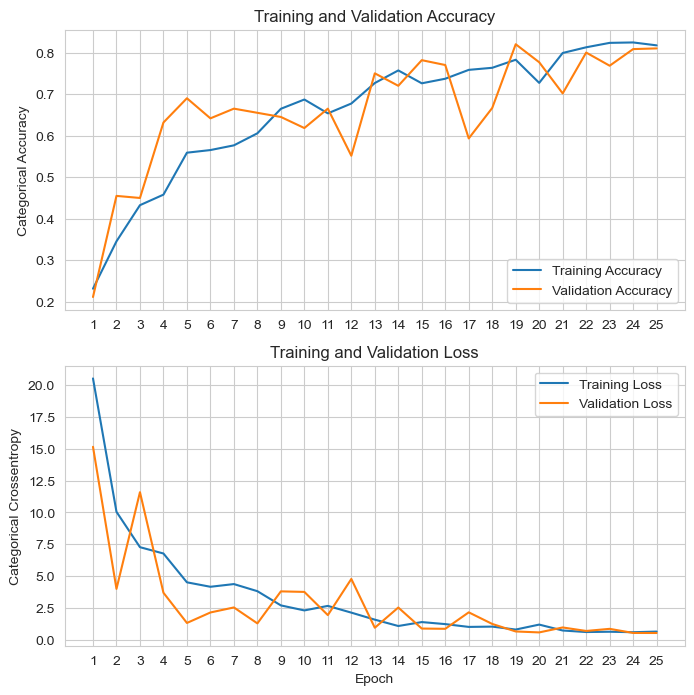

In [8]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Categorical Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(len(acc)), range(1, len(acc)+1))

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Crossentropy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(loss)), range(1, len(loss)+1))

plt.show()